# Plot representations 
Using $t$-SNE we plot:
* SARIMA
* Embedded id
* PCA

## Electricity

In [1]:
import numpy as np
import pandas as pd
import pickle
import torch

import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

OSError: [WinError 126] The specified module could not be found

In [19]:
rc("text", usetex=True)
ts_style = {
    "axes.spines.left": True,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": True,
    "ytick.left": True,
}
cluster_style = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": False,
    "ytick.left": False,
}
size = 4.77/3

NameError: name 'rc' is not defined

In [6]:
Y = np.load("electricity/data/electricity.npy")
Y_scaled = StandardScaler().fit_transform(Y.T).T
Y.shape, Y_scaled.shape

((370, 26136), (370, 26136))

## SARIMA

In [7]:
df = pd.read_csv("Z:\TCN_clone\TCN\\representations\\representation_matrices\electricity_sarima.csv", index_col=0).fillna(0)
df = df.set_index("id")
df = df.drop(columns=["sigma2"])
df.head()

,ar.L1,ar.L2,ma.L1,ma.S.L24,ar.S.L24,ma.L2,ma.L3,ar.L3
id,,,,,,,,
0,0.426385,0.245966,-0.991123,-0.568900,0.000000,0.000000,0.000000,0.0
1,0.912102,-0.303648,-0.990724,-0.992332,0.356028,0.000000,0.000000,0.0
2,-0.438073,0.408687,-0.006119,-0.996546,-0.165473,-0.993766,0.000000,0.0
3,0.636123,0.000000,-0.958304,-0.860509,0.217689,0.197579,-0.235923,0.0
4,0.817177,-0.180446,-0.941330,-0.864836,0.000000,0.000000,0.000000,0.0


In [8]:
len(df.columns)

8

In [9]:
tsne = TSNE(n_components=2, method="exact")
X_tsne = tsne.fit_transform(df.values)

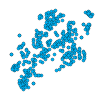

In [10]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=10,   linewidth=0.2)#clusters)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_electricity_sarima.pdf", bbox_inches="tight")

# PCA

In [11]:
from electricity.data import ElectricityDataSet
start="2012-01-04"
end="2014-12-16"
dataset_scaled = ElectricityDataSet(
    "electricity/data/electricity.npy",
    data_scaler=None,
    data_scale=True,
    start_date=start,
    end_date=end,
    predict_ahead=1,
    h_batch=0,
    receptive_field=385,
    cluster_covariate=False,
    random_covariate=False,
    cluster_dict_path=None,
)
dataset_unscaled = ElectricityDataSet(
    "electricity/data/electricity.npy",
    data_scaler=None,
    data_scale=False,
    start_date=start,
    end_date=end,
    predict_ahead=1,
    h_batch=0,
    receptive_field=385,
    cluster_covariate=False,
    random_covariate=False,
    cluster_dict_path=None,
)
dataset_scaled = dataset_scaled.X.squeeze().detach().numpy()
dataset_unscaled = dataset_unscaled.X.squeeze().detach().numpy()
dataset_scaled[1], dataset_unscaled[1], dataset_scaled.shape, dataset_unscaled.shape

Dimension of X :  torch.Size([370, 1, 25872])
Dimension of Y :  torch.Size([370, 1, 25872])
Dimension of X :  torch.Size([370, 1, 25872])
Dimension of Y :  torch.Size([370, 1, 25872])


(array([-0.77735406, -0.97109723, -0.9987692 , ..., -0.5559    ,
        -0.88808113, -1.1925513 ], dtype=float32),
 array([91.038, 86.06 , 85.349, ..., 96.728, 88.193, 80.37 ], dtype=float32),
 (370, 25872),
 (370, 25872))

In [17]:
X = PCA(n_components=10).fit_transform(dataset_scaled)
X_tsne = TSNE(n_components=2, method="exact").fit_transform(X)

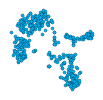

In [18]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=10,   linewidth=0.2)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_electricity_pca.pdf", bbox_inches="tight")

# Learned embedding

In [160]:
from electricity.model import TCN

In [161]:
MODEL_PATH = "Z:\TCN_clone\TCN\electricity\models\ce17bfb7d3594816a20faa55795a8084.pt"


In [162]:
args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))

model = TCN(
    num_layers=args.num_layers,
    in_channels=1,
    out_channels=1,
    residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
    kernel_size=args.kernel_size,
    bias=args.bias,
    dropout=args.dropout,
    stride=1,
    leveledinit=args.leveledinit,
    embedding_dim=args.embedding_dim,
    embed=args.embed,
)
model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
model.eval()

TCN(
  (tcn): TemporalConvolutionalNetwork(
    (net): Sequential(
      (0): ResidualBlock(
        (dcc1): DilatedCausalConv(1, 32, kernel_size=(7,), stride=(1,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,))
        (drop2): Dropout(p=0.2, inplace=False)
        (res_conv): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
      )
      (1): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(2,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(2,))
        (drop2): Dropout(p=0.2, inplace=False)
      )
      (2): ResidualBlock(
        (dcc1): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(4,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(32, 32, kernel_size=(7,), stride=(1,), dilation=(4,))
        (drop2): Dropout(p=0.2, inplace=Fa

In [163]:
ids = [i for i in range(370)]
embds = model.embedding(torch.LongTensor(ids)).detach().cpu().numpy()

In [181]:
X_tsne = TSNE(n_components=2, method="exact").fit_transform(embds)

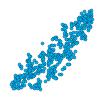

In [182]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=10,   linewidth=0.2)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_electricity_learned_3.pdf", bbox_inches="tight")

# Revenue

In [1]:

import matplotlib.pyplot as plt
from matplotlib import rc

AttributeError: module 'matplotlib.cbook' has no attribute '_classproperty'

## SARIMA

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("Z:\TCN_clone\TCN\\representations\\representation_matrices\\revenue_sarima.csv", index_col=0).fillna(0)
df = df.set_index("id")
df = df.drop(columns=["sigma2"])
df.head()

,ar.L1,ar.L2,ma.L1,ar.S.L4,ar.L3,ma.L2,ma.L3,ma.S.L4
id,,,,,,,,
0,0.927246,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.973690,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-1.343522,-0.637675,0.931381,-0.478300,0.0,0.0,0.0,0.0
3,-0.000000,-0.000000,0.000000,-0.599684,-0.0,0.0,0.0,0.0
4,0.912656,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
len(df.columns)

8

In [10]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df.values)

In [12]:
tsne = TSNE(n_components=2, n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15229 samples in 0.037s...
[t-SNE] Computed neighbors for 15229 samples in 0.769s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15229
[t-SNE] Computed conditional probabilities for sample 2000 / 15229
[t-SNE] Computed conditional probabilities for sample 3000 / 15229
[t-SNE] Computed conditional probabilities for sample 4000 / 15229
[t-SNE] Computed conditional probabilities for sample 5000 / 15229
[t-SNE] Computed conditional probabilities for sample 6000 / 15229
[t-SNE] Computed conditional probabilities for sample 7000 / 15229
[t-SNE] Computed conditional probabilities for sample 8000 / 15229
[t-SNE] Computed conditional probabilities for sample 9000 / 15229
[t-SNE] Computed conditional probabilities for sample 10000 / 15229
[t-SNE] Computed conditional probabilities for sample 11000 / 15229
[t-SNE] Computed conditional probabilities for sample 12000 / 15229
[t-SNE] Computed conditional probabilities for sam

In [13]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=10,   linewidth=0.2)#clusters)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_electricity_sarima.pdf", bbox_inches="tight")

NameError: name 'plt' is not defined

## PCA

In [ ]:
X = df.values.T
X_pca = PCA(n_components=2).fit_transform(X)

In [ ]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=10,   linewidth=0.2)#clusters)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_electricity_sarima.pdf", bbox_inches="tight")